Решить методом простой итерации нелинейное уравнение func_of_x(x) = 0

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import linalg as LA
# arctg(x – 1) + 2x = 0

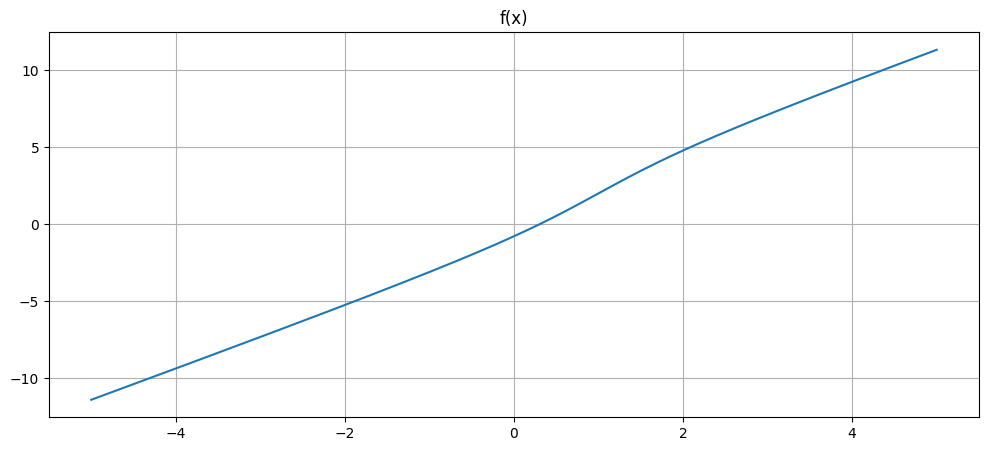

In [ ]:
def func_of_x(x):
    return (math.atan(x - 1) + 2 * x)

x = np.linspace(start = -5, stop = 5, num = 100)
y = list(map(lambda i: func_of_x(i), x))
plt.figure(figsize=[12, 5], dpi=100)
plt.plot(x, y)
plt.title("f(x)")
plt.grid()

 По графику видим, что корень находится в границах (0; 1)

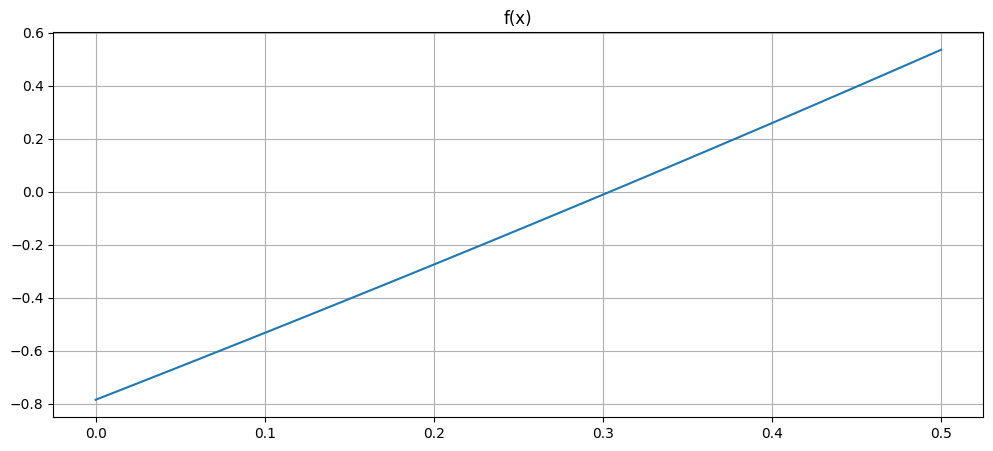

In [52]:
x = np.linspace(start = 0, stop = 0.5, num = 100)
y = list(map(lambda i: func_of_x(i), x))
plt.figure(figsize=[12, 5], dpi=100)
plt.plot(x, y)
plt.title("f(x)")
plt.grid()

 По уточненному графику видим, что корень находится в границах (0,25; 0,35)
 Строим итерационный процесс x = -0.5 * arctg(x - 1)

In [63]:
def get_next_x(x):
    return -0.5 * math.atan(x - 1)

cur_x = 0.35
i = 0
while abs(func_of_x(cur_x)) > 1e-18:
    cur_x = get_next_x(cur_x)
    i += 1
print("Количество итераций = ", i)
print("x = ", cur_x)

Количество итераций =  36
x =  0.3040135965926769


 Решить систему нелинейных уравнений методом Ньютона.
 
   sin(x) - y - 1.32 = 0
   
   cos(y) - x + 0.85 = 0

In [91]:
def F(x, y):
    F = np.zeros((2, 1))
    F[0][0] = math.sin(x) - y - 1.32
    F[1][0] = math.cos(y) - x + 0.85
    return F
def Jacobian_matrix(x, y):
    J = np.zeros((2, 2))
    J[0][0] = math.cos(x)
    J[0][1] = -1
    J[1][0] = -1
    J[1][1] = -math.sin(y)
    print("Якобиан = ", LA.det(J))
    return J
def get_next_x(x):
    J = Jacobian_matrix(x[0][0], x[1][0])
    return x - (LA.inv(J)) @ F(x[0][0], x[1][0])

cur_x = [[0], [0]]
while LA.norm(F(cur_x[0][0], cur_x[1][0])) > 1e-6:
    print("Разница: ", LA.norm(F(cur_x[0][0], cur_x[1][0])))
    cur_x = get_next_x(cur_x)
print("Получившийся корень: (", cur_x[0][0], "; ", cur_x[1][0])

Разница:  2.2726416347501863
Якобиан =  -1.0
Разница:  0.8992517249065116
Якобиан =  -0.8606799417193355
Разница:  0.46984607087243024
Якобиан =  -1.2650459229007682
Разница:  0.06724690501132459
Якобиан =  -1.0704054737991768
Разница:  0.0016796251350445933
Якобиан =  -1.0743488908106167
Разница:  1.3232653715096461e-06
Якобиан =  -1.0738229982089673
Получившийся корень: ( 1.7913386099646136 ;  -0.3442210364068228
